# Model Selection 

The objective of this notebook is to build a very first ent to end Machine Learning model to predict the probability of a patient being discharged on a particular day.

We'll use the dataset generated by the `dataset` job of the ETL folder. 

At this instance, the focus won't be on model performance but rather on understanding the value potential of the available data and the speedness of the solution.

In [1]:
%cd /Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital

/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital


In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt   
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from thesis_lib.utils import * 
from thesis_lib.modelling.data import *
from thesis_lib.modelling.model import *
import warnings
warnings.filterwarnings('ignore')

/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
data = Data().load('data/hospital_dataset')
variables = data.get_variables_dict()
data.get_stats()

Loading dataset:  hospital_train_data.parquet
Loading dataset:  hospital_val_data.parquet
Loading dataset:  hospital_test_data.parquet


dataset_type,train,val,test
n_observations,319150,33482,33309
relative_size,0.82694,0.0867542,0.0863059
n_cols,71,71,71
positives,42697,4555,4507
negatives,276453,28927,28802
positive_prop,0.133783,0.136043,0.135309
negative_prop,0.866217,0.863957,0.864691
min_date,2017-01-01,2018-11-11,2018-11-11
max_date,2018-11-10,2019-11-11,2019-11-11


In [4]:
categorical_features = ['date',
 'images_requester_roles',
 'images_study_types',
 'labos_requester_roles',
 'sectors_last_sector',
 'sectors_names',
 'surgeries_actual',
 'surgeries_anesthesia_types',
 'surgeries_bact_positive',
 'surgeries_injury_condition',
 'surgeries_post_surgery_condition',
 'surgeries_scheduled',
 'surgeries_scheduled_done',
 'surgeries_services',
 'surgeries_types',
 'gender',
 'insurance_entity',
 'entity_group',
 'origin',
 'admission_sector',
 'isolation',
 'presumptive_dianogsis',
 'responsible_sector',
 'ARM_TEP',
 'CEC_TEP',
 'request_origin',
 'request',
 'request_diagnosis',
 'request_sector',
 'admission_date']

In [5]:
numerical_features = ['hosp_day_number',
 'images_count',
 'images_cumulative',
 'images_emergencies',
 'images_requester_roles_count',
 'images_requesters_count',
 'images_study_types_count',
 'labos_count',
 'labos_cumulative',
 'labos_emergencies',
 'labos_requester_roles_count',
 'labos_requesters_count',
 'labos_set_count',
 'labos_set_cumulative',
 'sectors_count',
 'sectors_last_stay',
 'surgeries_count',
 'surgeries_cumulative',
 'surgeries_post_surgery_duration',
 'surgeries_pre_surgery_duration',
 'surgeries_prep_duration',
 'surgeries_services_count',
 'surgeries_surgery_delay',
 'surgeries_surgery_duration',
 'surgeries_types_count',
 'emergency_service',
 'new_born_weight',
 'new_born_gestation_age',
 'PIM2TEP',
 'high_risk_TEP',
 'low_risk_TEP',
 'patient_age']

In [6]:
model_params = {'classifier': 'lgbm',
               'accepts_sparse': True,
                'categorical_features' : categorical_features ,
                'numerical_features' : numerical_features,
               'scale_numerical': False}

In [7]:
lgbm_extra_features = Model(**model_params)
lgbm_extra_features.transform(data)

Fitting pipeline...
	 Preprocessing data
	 Preprocessing data
	 Encoding Categorical Features with OneHotEncoding
Transforming data...
	 Transforming numerical features
	 Preprocessing data
	 Transforming categorical features
	 Preprocessing data
	 Transforming numerical features
	 Preprocessing data
	 Transforming categorical features
	 Preprocessing data


### Baseline

In [8]:
len(lgbm_extra_features.model_features)

28081

In [9]:
%%time
lgbm_extra_features.fit_classifier()

Training classifier
[10]	training_set's auc: 0.852829	validation_set's auc: 0.846827
[20]	training_set's auc: 0.858948	validation_set's auc: 0.850891
[30]	training_set's auc: 0.862527	validation_set's auc: 0.853504
[40]	training_set's auc: 0.865817	validation_set's auc: 0.855759
[50]	training_set's auc: 0.868183	validation_set's auc: 0.856908
[60]	training_set's auc: 0.869935	validation_set's auc: 0.857524
[70]	training_set's auc: 0.87151	validation_set's auc: 0.857317
[80]	training_set's auc: 0.872976	validation_set's auc: 0.857658
[90]	training_set's auc: 0.874215	validation_set's auc: 0.857861
[100]	training_set's auc: 0.875622	validation_set's auc: 0.858282
CPU times: user 41.8 s, sys: 576 ms, total: 42.4 s
Wall time: 12.3 s


In [10]:
lgbm_extra_features.classifier.get_params()

{'objective': 'binary',
 'metric': 'auc',
 'is_unbalance': True,
 'max_depth': 7,
 'learning_rate': 0.1,
 'num_iterations': 100,
 'feature_names': ['hosp_day_number',
  'images_count',
  'images_cumulative',
  'images_emergencies',
  'images_requester_roles_count',
  'images_requesters_count',
  'images_study_types_count',
  'labos_count',
  'labos_cumulative',
  'labos_emergencies',
  'labos_requester_roles_count',
  'labos_requesters_count',
  'labos_set_count',
  'labos_set_cumulative',
  'sectors_count',
  'sectors_last_stay',
  'surgeries_count',
  'surgeries_cumulative',
  'surgeries_post_surgery_duration',
  'surgeries_pre_surgery_duration',
  'surgeries_prep_duration',
  'surgeries_services_count',
  'surgeries_surgery_delay',
  'surgeries_surgery_duration',
  'surgeries_types_count',
  'emergency_service',
  'new_born_weight',
  'new_born_gestation_age',
  'PIM2TEP',
  'high_risk_TEP',
  'low_risk_TEP',
  'patient_age',
  'date_2017_01_01',
  'date_2017_01_02',
  'date_2017_01

In [11]:
lgbm_extra_features.get_performance_metrics()

training AUC ROC score:  0.8756221948266578
validation AUC ROC score:  0.8582821847963782
relative over-fitting:  0.019803072755267853


In [9]:
lgbm_extra_features.classifier.lgbm_classifier

In [9]:
import lightgbm as lgbm

In [10]:
booster = lgbm_extra_features.classifier.lgbm_classifier

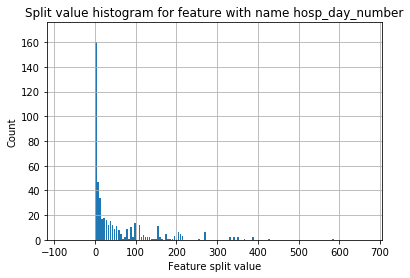

In [11]:
lgbm.plot_split_value_histogram(booster, feature='hosp_day_number')

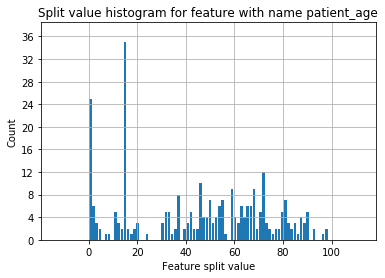

In [12]:
lgbm.plot_split_value_histogram(booster, feature='patient_age')

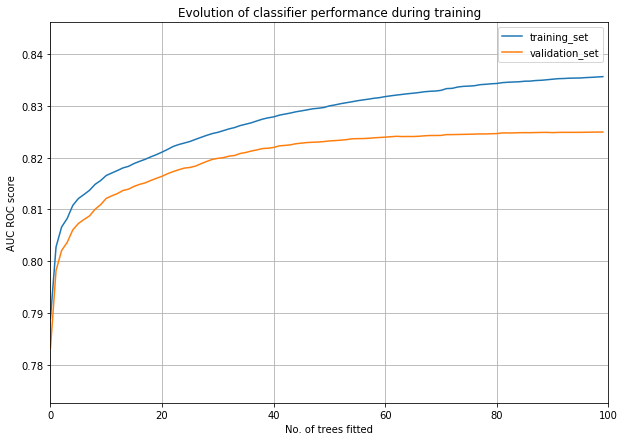

In [15]:
lgbm.plot_metric(lgbm_extra_features.classifier.evals_result, metric='auc',figsize=(10,7),
                ylabel='AUC ROC score', xlabel='No. of trees fitted', title='Evolution of classifier performance during training')

In [21]:
tree_plot = lgbm.create_tree_digraph(booster,1,show_info=[ 'internal_value', 'internal_count', 
                                              'leaf_count', 'data_percentage'],format='png')

In [22]:
tree_plot.view('tree_plot')

'tree_plot.png'

In [24]:
#lgbm.create_tree_digraph(booster,99)

In [29]:
lgbm_extra_features = Model(**model_params)
lgbm_extra_features.transform(data)

Fitting pipeline...
	 Preprocessing data
	 Preprocessing data
	 Encoding Categorical Features with OneHotEncoding
Transforming data...
	 Transforming numerical features
	 Preprocessing data
	 Transforming categorical features
	 Preprocessing data
	 Transforming numerical features
	 Preprocessing data
	 Transforming categorical features
	 Preprocessing data


In [8]:
lgbm_param_grid = {'max_depth': [3,7,10],
                  'learning_rate': [0.1,0.01,0.001,0.0001],
                  'num_iterations': [50,100,150,200,250]}

In [12]:
lgbm_extra_features.optimize_hyperparams(params_dict=lgbm_param_grid,
                                         n_folds=3,n_iter=3,
                                         search_type='grid')

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 26

{'mean_fit_time': array([ 64.92780105, 144.64713144, 149.57317098, 114.09175666,
        101.84810201,  32.80306697,  16.14259529,  20.47130871,
         25.2060918 ,  38.70569412,  14.2543753 ,  19.1498793 ,
         25.36560233,  28.04478534,  37.19624972,   8.16008576,
         14.04002794,  22.97587474,  29.93978095,  37.86689218,
         14.99363534,  23.82972884,  36.31170901,  41.39803878,
         44.5209198 ,  11.05043705,  20.39731638,  35.75414801,
         41.00657201,  48.77984778,   7.19711606,  12.67601538,
         16.97701788,  31.29427131,  39.34724665,  15.73033532,
         29.8630782 ,  34.31700714,  46.05095196,  79.46430945,
         20.37155739,  25.53275768,  27.04589399,  37.1858484 ,
         51.19154167,   7.19599303,  12.14863618,  16.99211375,
         18.92939734,  22.44352595,   9.35316126,  17.6904463 ,
         23.97265553,  32.44941497,  41.63331652,  12.31978281,
         19.7761604 ,  28.39246798,  32.68987258,  34.42584801]),
 'std_fit_time': arra

In [13]:
exp_results = lgbm_extra_features.get_model_selection_results()

In [14]:
exp_results.to_csv('experiments/extra_Features_model/lgb_extra_features_grid_search_results.csv')

In [15]:
exp_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_num_iterations,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,64.927801,0.401781,5.302617,0.697977,0.1,3,50,0.847778,0.851426,0.836252,0.845152,0.006467,14
1,144.647131,25.562789,5.418238,3.184708,0.1,3,100,0.849012,0.851023,0.837694,0.845909,0.005867,12
2,149.573171,33.938376,3.625033,0.426570,0.1,3,150,0.847646,0.845930,0.837425,0.843667,0.004469,18
3,114.091757,7.426251,5.257744,0.347608,0.1,3,200,0.846140,0.842020,0.837043,0.841734,0.003719,22
4,101.848102,3.796765,3.909935,0.820107,0.1,3,250,0.845281,0.838677,0.836922,0.840293,0.003599,26
5,32.803067,3.570504,1.530670,0.667290,0.1,7,50,0.855064,0.852877,0.842385,0.850108,0.005534,8
6,16.142595,1.015290,1.074420,0.067070,0.1,7,100,0.851608,0.842600,0.839436,0.844548,0.005157,15
7,20.471309,0.450044,1.545534,0.107937,0.1,7,150,0.850330,0.837770,0.838176,0.842092,0.005828,20
8,25.206092,0.400348,2.032460,0.136585,0.1,7,200,0.849153,0.834389,0.836453,0.839998,0.006528,28
9,38.705694,2.017024,3.760120,0.617705,0.1,7,250,0.848789,0.832113,0.835870,0.838924,0.007142,31


In [26]:
best_params = lgbm_extra_features.model_selection.best_params_
best_params

{'learning_rate': 0.1, 'max_depth': 7, 'num_iterations': 250}

In [8]:
best_params = {'learning_rate': 0.01, 'max_depth': 10, 'num_iterations': 250}

In [9]:
%%time
lgbm_extra_features.fit_classifier(**best_params)

Training classifier
[10]	training_set's auc: 0.843367	validation_set's auc: 0.838748
[20]	training_set's auc: 0.846493	validation_set's auc: 0.841931
[30]	training_set's auc: 0.848667	validation_set's auc: 0.843776
[40]	training_set's auc: 0.84996	validation_set's auc: 0.84488
[50]	training_set's auc: 0.851014	validation_set's auc: 0.845717
[60]	training_set's auc: 0.851985	validation_set's auc: 0.846396
[70]	training_set's auc: 0.852748	validation_set's auc: 0.847021
[80]	training_set's auc: 0.853528	validation_set's auc: 0.847525
[90]	training_set's auc: 0.854449	validation_set's auc: 0.848195
[100]	training_set's auc: 0.855244	validation_set's auc: 0.848685
[110]	training_set's auc: 0.855913	validation_set's auc: 0.849086
[120]	training_set's auc: 0.856635	validation_set's auc: 0.849608
[130]	training_set's auc: 0.857274	validation_set's auc: 0.850066
[140]	training_set's auc: 0.857752	validation_set's auc: 0.850416
[150]	training_set's auc: 0.858206	validation_set's auc: 0.85076
[1

In [10]:
lgbm_extra_features.get_performance_metrics()

training AUC ROC score:  0.8622738982263497
validation AUC ROC score:  0.8536744165078549
relative over-fitting:  0.009973027985867886


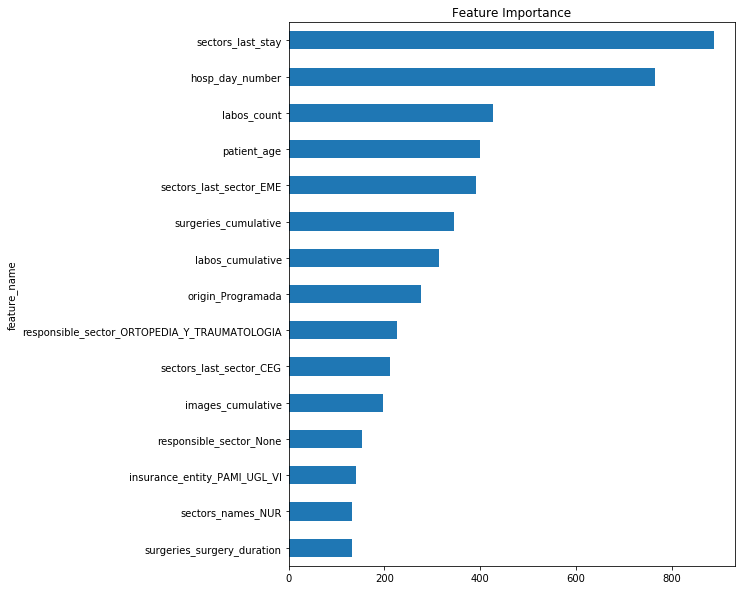

In [11]:
lgbm_extra_features.plot_feature_importance(15)

In [13]:
lgbm_extra_features.classifier

LGBM_classifier(is_unbalance=True, learning_rate=0.1, max_depth=7, metric='auc',
                num_iterations=250, objective='binary')